# Trame DMX512

On recommence tant que la trame ne comporte pas 8 canaux
entrer votre trame de 8 canaux sépérés par des virgules
 ex: 0,0,0,255,0,255,0,0 : 0,255,0,128,0,53,0,85


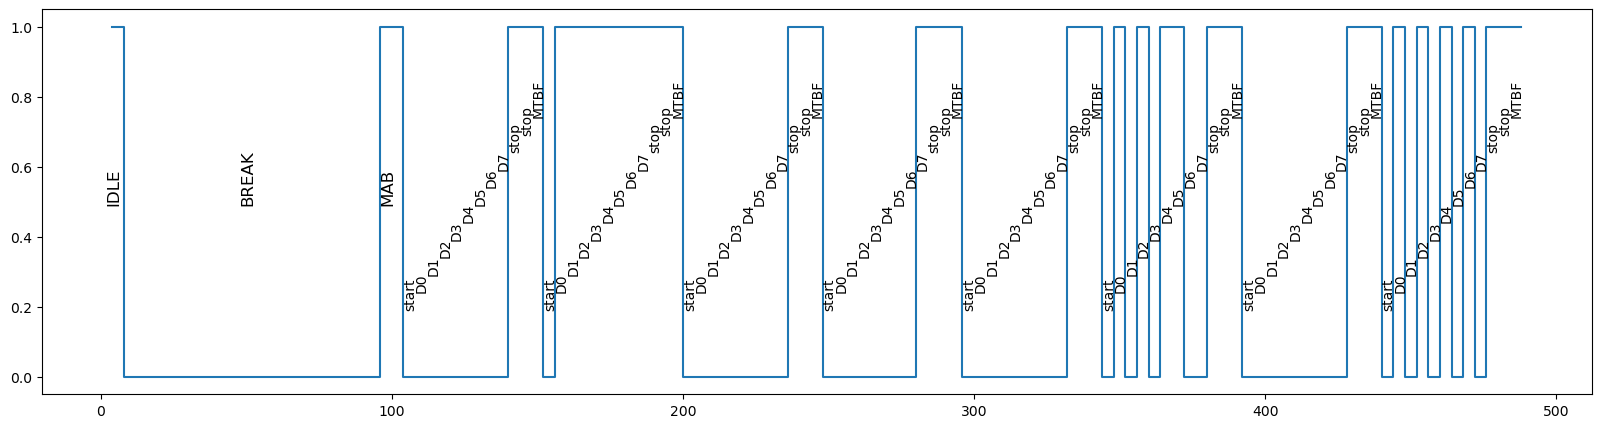

In [1]:
# coding: utf-8
from pylab import *

def trame_debut() :
    lbreak = 88
    mab = 8
    idle = 4
    dep = 4
    l0=[dep,idle,lbreak,mab]
    t0=['','IDLE','BREAK','MAB']
    # l2=[1,1,0,0,1,1]
    l2=[(a//2)%2 for a in range(2,8)]
    s=0
    l1=[]
    j=0
    for i in l0 :      
        text(s+i/2-4, 0.5, t0[j], fontsize=12,rotation=90)
        s=s+i
        j+=1
        l1.append(s)
        l1.append(s)
    l1.pop(0)
    l1.pop(-1)
    return l1,l2

def decode_trame(dec,taille):
    b=bin(dec)[2:] #conversion en binaire et on enlève '0b'
    b='0'*(8-len(b))+b #on remplit les 0 manquants pour avoir 8 bits 
    mot='0'+b[::-1]+'111' #bits d'une trame
    nom=['start']+[f'D{i}' for i in range(8)]+['stop','stop','MTBF']#liste des noms d'une trame
    l=[]
    j=0
    for i in mot:
        text(0+taille+4*j, 0.2+0.05*j, nom[j], fontsize=10,rotation=90)
        j+=1
        l.append(int(i))
        l.append(int(i))
    return l

#programme principal
lx,ly=trame_debut()
taille=lx[-1]
dernier=taille//2+1
trame=[]
while len(trame) != 8 : #vous pouvez modifier si vous voulez !
    print("On recommence tant que la trame ne comporte pas 8 canaux")
    print("entrer votre trame de 8 canaux sépérés par des virgules")
    a=input(" ex: 0,0,0,255,0,255,0,0 : ")
    trame=a.split(',')
lx+=[4*(x//2) for x in range(dernier,dernier+len(trame)*2*12)]
k=0
for t in trame :
    ly+=decode_trame(int(t),taille+12*4*k)
    k+=1
x = array(lx)
y = array(ly)
plot(x,y)
gcf().set_size_inches(20, 5)
#savefig("trame_DMX_"+a+".svg", format="svg")
show()